## Applied - Question 8

This question will use a simulated dataset

#### Import block

In [1]:
from operator import itemgetter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model as skl_lm
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf

from best_select import best_select

%matplotlib inline
plt.style.use('seaborn-white')


(a,b) Using random package to simulated data with length of 100 then create Y

,x,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9,x^10,y
0,-0.416758,0.173687,-0.072385,0.030167,-1.257242e-02,5.239655e-03,-2.183667e-03,9.100606e-04,-3.792749e-04,1.580658e-04,2.468386
1,-0.056267,0.003166,-0.000178,0.000010,-5.639780e-07,3.173325e-08,-1.785529e-09,1.004661e-10,-5.652907e-12,3.180711e-13,3.122136
2,-2.136196,4.563334,-9.748176,20.824015,-4.448418e+01,9.502693e+01,-2.029962e+02,4.336396e+02,-9.263392e+02,1.978842e+03,-69.167693
3,1.640271,2.690488,4.413129,7.238727,1.187347e+01,1.947571e+01,3.194544e+01,5.239917e+01,8.594884e+01,1.409794e+02,67.495542
4,-1.793436,3.216411,-5.768426,10.345301,-1.855363e+01,3.327474e+01,-5.967611e+01,1.070253e+02,-1.919429e+02,3.442372e+02,-38.888634


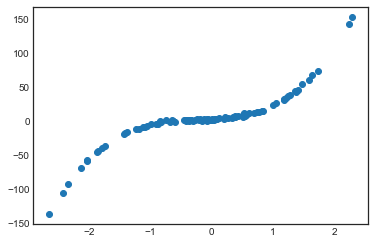

In [2]:
np.random.seed(2)

# Random Normal
x = np.random.normal(0,1, size=100)
eps = np.random.normal(0,1, size=100)

# Y
b_0, b_1, b_2, b_3 = 3, 5, 6, 9
y = b_0 + b_1*x + b_2*(x**2) + b_3*(x**3) + eps

# first look
plt.scatter(x,y)

# Create dataframe
df = pd.DataFrame({'x': x, 'x^2': x**2, 'x^3': x**3, 'x^4': x**4, 'x^5': x**5, 
                   'x^6': x**6, 'x^7': x**7, 'x^8': x**8, 'x^9': x**9,
                   'x^10': x**10, 'y':y})
df.head()

Perform best subset using the function best_select we wrote in the lab

In [3]:
y = df.y
X= df.drop('y', axis=1)

best_df = best_select(y, X)

d:\pycharmprojects\islr\venv\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


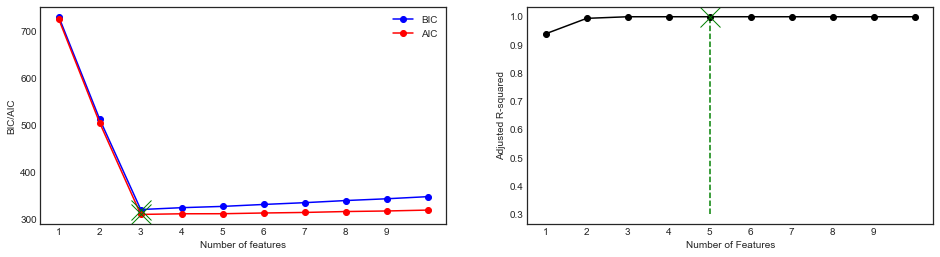

In [4]:
# set up variables for plotting
bics = best_df.bic
aics = best_df.aic
adj_R_squared = best_df.adj_R_squared
min_bic_index, min_bic = min(enumerate(bics), key=itemgetter(1))
min_aic_index, min_aic = min(enumerate(aics), key=itemgetter(1))
max_adjR_index, max_adjR = max(enumerate(adj_R_squared), key=itemgetter(1))

# Set up plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

# Left plot
ax1.plot(best_df.num_features, bics, color='b', label='BIC', marker='o')
ax1.plot(best_df.num_features, aics, color='r', label='AIC', marker='o')
ax1.plot(min_bic_index+1, min_bic, color='g', marker='x', markersize=20)
ax1.plot(min_aic_index+1, min_aic, color='g', marker='x', markersize=20)
ax1.set_ylabel('BIC/AIC')
ax1.set_xlabel('Number of features')
ax1.set_xticks(np.arange(1, len(best_df), step=1))
ax1.legend()

# Right plot
ax2.plot(best_df.num_features, adj_R_squared, color='k', marker='o')
ax2.plot(max_adjR_index+1, max_adjR, color='g', marker='x', markersize=20)
ax2.set_ylabel('Adjusted R-squared')
ax2.set_xlabel('Number of Features')
ax2.set_xticks(np.arange(1, len(best_df), step=1))
ax2.vlines(max_adjR_index+1, ymin=0.3, ymax=max_adjR, linestyles='--', color='g')

As expected, the best model contains 1, 2 and 3 degree polynomial features of x. 
However, adjusted R squared is slightly wrong at 5 degree. Next, we use statsmodels 
to get a nice table showing all coefficients.

The model gives a very good estimates of our true betas

In [5]:
regr = smf.ols('y ~ x + I(x**2) + I(x**3)', data=df).fit()
regr.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.2665,0.139,23.417,0.000,2.990,3.543
x,5.0304,0.207,24.343,0.000,4.620,5.441
I(x ** 2),5.8671,0.084,70.093,0.000,5.701,6.033
I(x ** 3),8.9835,0.059,152.096,0.000,8.866,9.101


(d) Repeating part c with forward selection. Again, we get the best out of 3 features
model.

   num_features                 features  R_squared          RSS  \
0             1                    [x^3]   0.939506  8189.347597   
1             2               [x^3, x^2]   0.993532   884.573151   
2             3            [x^3, x^2, x]   0.999098   124.611867   
3             4       [x^3, x^2, x, x^9]   0.999104   125.109141   
4             5  [x^3, x^2, x, x^9, x^4]   0.999109   125.763552   

   adj_R_squared         aic         bic  
0       0.938888  726.309369  731.519709  
1       0.993399  504.735289  512.550799  
2       0.999070  309.708873  320.129554  
3       0.999066  311.060007  324.085858  
4       0.999062  312.523505  328.154526  


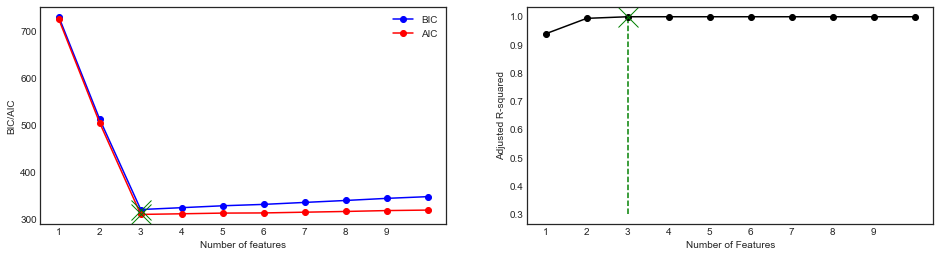

In [6]:
from forward_select import forward_select

k = 10
y = df.y
X = df.drop('y', axis=1)

forward_df = forward_select(y, X, k)
print(forward_df.head())

# set up variables for plotting
bics = forward_df.bic
aics = forward_df.aic
adj_R_squared = forward_df.adj_R_squared
min_bic_index, min_bic = min(enumerate(bics), key=itemgetter(1))
min_aic_index, min_aic = min(enumerate(aics), key=itemgetter(1))
max_adjR_index, max_adjR = max(enumerate(adj_R_squared), key=itemgetter(1))

# Set up plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

# Left plot
ax1.plot(forward_df.num_features, bics, color='b', label='BIC', marker='o')
ax1.plot(forward_df.num_features, aics, color='r', label='AIC', marker='o')
ax1.plot(min_aic_index+1, min_bic, color='g', marker='x', markersize=20)
ax1.plot(min_aic_index+1, min_aic, color='g', marker='x', markersize=20)
ax1.set_ylabel('BIC/AIC')
ax1.set_xlabel('Number of features')
ax1.set_xticks(np.arange(1, len(best_df), step=1))
ax1.legend()

# Right plot
ax2.plot(forward_df.num_features, adj_R_squared, color='k', marker='o')
ax2.plot(max_adjR_index+1, max_adjR, color='g', marker='x', markersize=20)
ax2.set_ylabel('Adjusted R-squared')
ax2.set_xlabel('Number of Features')
ax2.set_xticks(np.arange(1, len(best_df), step=1))
ax2.vlines(max_adjR_index+1, ymin=0.3, ymax=max_adjR, linestyles='--', color='g')

### (e) Fitting lasso
Using a range of alphas to get a better understanding of how error changes.

Best alpha is 0.05

x       4.767376
x^2     5.846476
x^3     9.097560
x^4     0.000000
x^5     0.000000
x^6     0.000000
x^7    -0.005431
x^8    -0.002460
x^9     0.000687
x^10    0.000447
dtype: float64


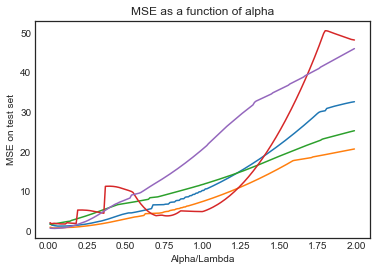

In [8]:
# Getting X, y and define alphas
y = df.y
X = df.drop('y', axis=1)
alphas = np.arange(0.01, 2, 0.01)

# Running lasso with 5-fold CV
lasso_cv = skl_lm.LassoCV(alphas=alphas, cv=5, fit_intercept=True, max_iter=1000000)
lasso_cv.fit(X,y)
print(f'Best alpha is {lasso_cv.alpha_}\n')

# plot MSE vs. alpha. Each line is a fold.
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_)
plt.xlabel('Alpha/Lambda')
plt.ylabel('MSE on test set')
plt.title('MSE as a function of alpha')

# Coefficients
print(pd.Series(lasso_cv.coef_, index=X.columns))

Since our best alpha is 0.5, we can see that MSE keep increasing nonstop. Looking at the
coefficients with the best alpha, we can see that all other coefficients are pushed/regularized
into 0/near 0. Only the 1, 2, and 3 degree poly has a good effect here. (which is good!)

#### (f) Generate different Y. 
First is the best subset selection.

,num_features,RSS,R_squared,features,adj_R_squared,aic,bic
6,1,125.467583,0.999995,"(x^7,)",0.999995,308.455160,313.665500
36,2,122.921696,0.999995,"(x^4, x^7)",0.999995,307.379521,315.195032
165,3,122.660311,0.999995,"(x^6, x^7, x^8)",0.999995,308.130372,318.551053
285,4,122.853788,0.999995,"(x^2, x^4, x^6, x^7)",0.999995,309.240852,322.266703
557,5,123.429071,0.999995,"(x^2, x^4, x^6, x^7, x^9)",0.999995,310.649814,326.280836


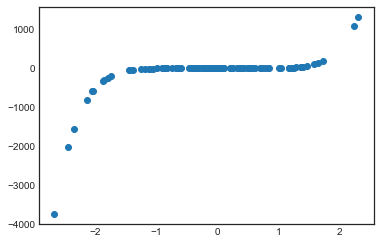

In [31]:
# Regenerate y
b_7 = 4
y = b_0 + b_7*(x**7) + eps
X = df.drop('y', axis=1)

# First look
plt.scatter(x,y)

# best subset
best_df = best_select(y, X)
best_df.head()

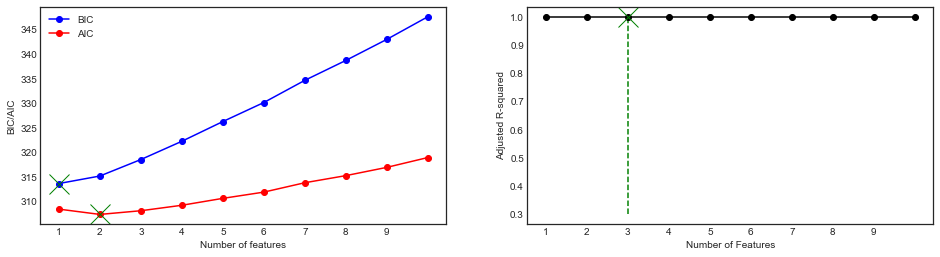

In [18]:
# set up variables for plotting
bics = best_df.bic
aics = best_df.aic
adj_R_squared = best_df.adj_R_squared
min_bic_index, min_bic = min(enumerate(bics), key=itemgetter(1))
min_aic_index, min_aic = min(enumerate(aics), key=itemgetter(1))
max_adjR_index, max_adjR = max(enumerate(adj_R_squared), key=itemgetter(1))

# Set up plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

# Left plot
ax1.plot(best_df.num_features, bics, color='b', label='BIC', marker='o')
ax1.plot(best_df.num_features, aics, color='r', label='AIC', marker='o')
ax1.plot(min_bic_index+1, min_bic, color='g', marker='x', markersize=20)
ax1.plot(min_aic_index+1, min_aic, color='g', marker='x', markersize=20)
ax1.set_ylabel('BIC/AIC')
ax1.set_xlabel('Number of features')
ax1.set_xticks(np.arange(1, len(best_df), step=1))
ax1.legend()

# Right plot
ax2.plot(best_df.num_features, adj_R_squared, color='k', marker='o')
ax2.plot(max_adjR_index+1, max_adjR, color='g', marker='x', markersize=20)
ax2.set_ylabel('Adjusted R-squared')
ax2.set_xlabel('Number of Features')
ax2.set_xticks(np.arange(1, len(best_df), step=1))
ax2.vlines(max_adjR_index+1, ymin=0.3, ymax=max_adjR, linestyles='--', color='g')

While AIC and BIC gives us a pretty good idea on choosing features, adjusted R squared
is not performing as well as one hope! Nevertheless, best subset correctly identify the 
7th degree feature is the best one. 

Best alpha is 0.016999999999999994

x        6.773034
x^2     -0.000000
x^3    -17.041767
x^4      1.050398
x^5     10.592451
x^6     -0.419388
x^7      1.619147
x^8      0.001662
x^9      0.177557
x^10     0.007766
dtype: float64
3.0431609319185497


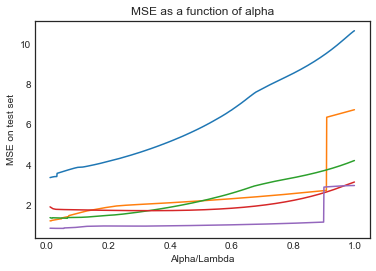

In [43]:
# Redeclare parameters
alphas = np.arange(0.01, 1, 0.001)

# Run lasso CV with 10-fold CV
lasso_cv = skl_lm.LassoCV(alphas=alphas, fit_intercept=True, cv=5, max_iter=1000000)
lasso_cv.fit(X,y)

# Best alpha
print(f'Best alpha is {lasso_cv.alpha_}\n')

# Plot mse vs alpha
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_)
plt.xlabel('Alpha/Lambda')
plt.ylabel('MSE on test set')
plt.title('MSE as a function of alpha')

print(pd.Series(lasso_cv.coef_, index=X.columns))
print(lasso_cv.intercept_)

It takes me a while to realize I ran the lassco CV correctly. However, our result is
quite different from true model. The lasso CV includes almost every features to some extend.
But once we plot the model, it is almost indistinguishable from the original. 

Perhaps a polynomial can be represented with a linear combination of other polynomial.

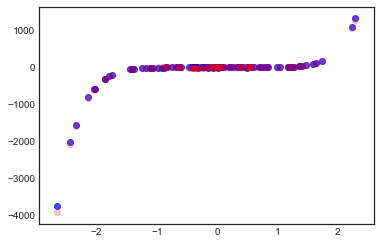

In [52]:
plt.scatter(x, y, color='b', alpha=0.7)
plt.scatter(x, 3+6.77*x-17.041*(x**3)+1.05*(x**4)+10.59*(x**5)
            -0.419*(x**6)+1.619*(x**7)+0.177*(x**9), color='r', alpha=0.2)
